<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap12/Trial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"
!pip install --no-cache-dir git+https://github.com/NVIDIA/apex > /dev/null && echo "Apex library is successfully installed!"!

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-u92qoh34
Albumentation library is successfully installed!
  Running command git clone -q https://github.com/NVIDIA/apex /tmp/pip-req-build-1xhv06cm
  Running command git submodule update --init --recursive -q
Apex library is successfully installed!!


In [2]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap12/'
os.chdir(folder)
print(os.getcwd()) 
for items in os.listdir(folder):
   print(items)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap12
template
Trial1.ipynb
Trial2.ipynb
Untitled0.ipynb
Trial3.ipynb


In [0]:
from template import TinyImageNet
from template import DatasetFromSubset
from template import download_extract
from template import Albumentationtransform

In [5]:
IMAGES_URL = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
fileName = "tiny-imagenet-200.zip"
download_extract.download_images(IMAGES_URL)

In [6]:
def get_classes(download_folder):
    classes = []
    wnids = open(os.path.join(download_folder,"wnids.txt"), "r")
    for line in wnids:
        classes.append(line.strip())
    return classes

print(folder)
download_folder = folder + 'tiny-imagenet-200/'
if (os.path.isdir(download_folder)==False):
    print(download_folder," does not exist")
else :    
    classes = get_classes(download_folder)
    print(classes)

/content/gdrive/My Drive/school_of_ai/chap12/
['n02124075', 'n04067472', 'n04540053', 'n04099969', 'n07749582', 'n01641577', 'n02802426', 'n09246464', 'n07920052', 'n03970156', 'n03891332', 'n02106662', 'n03201208', 'n02279972', 'n02132136', 'n04146614', 'n07873807', 'n02364673', 'n04507155', 'n03854065', 'n03838899', 'n03733131', 'n01443537', 'n07875152', 'n03544143', 'n09428293', 'n03085013', 'n02437312', 'n07614500', 'n03804744', 'n04265275', 'n02963159', 'n02486410', 'n01944390', 'n09256479', 'n02058221', 'n04275548', 'n02321529', 'n02769748', 'n02099712', 'n07695742', 'n02056570', 'n02281406', 'n01774750', 'n02509815', 'n03983396', 'n07753592', 'n04254777', 'n02233338', 'n04008634', 'n02823428', 'n02236044', 'n03393912', 'n07583066', 'n04074963', 'n01629819', 'n09332890', 'n02481823', 'n03902125', 'n03404251', 'n09193705', 'n03637318', 'n04456115', 'n02666196', 'n03796401', 'n02795169', 'n02123045', 'n01855672', 'n01882714', 'n02917067', 'n02988304', 'n04398044', 'n02843684', 'n02

In [0]:
from torch.utils.data import Dataset, random_split
def TinyImageNetDataSet(train_split = 70,test_transforms = None,train_transforms = None):
  dataset = TinyImageNet.TinyImageNet(classes,download_folder)
  train_len = len(dataset)*train_split//100
  test_len = len(dataset) - train_len 
  train_set, val_set = random_split(dataset, [train_len, test_len])
  train_dataset = DatasetFromSubset.DatasetFromSubset(train_set, transform=train_transforms)
  test_dataset = DatasetFromSubset.DatasetFromSubset(val_set, transform=test_transforms)
  
  return train_dataset, test_dataset,classes

In [15]:
import albumentations as A
import cv2
train_transform = Albumentationtransform.AlbumentationTransforms([       
                                                                
                                      A.HorizontalFlip(p = 0.7),
                                      A.PadIfNeeded(min_height=70, min_width=70, border_mode=4, value=None, mask_value=None, always_apply=False, p=1.0),
                                      A.GaussNoise(var_limit=(10.0, 50.0), mean=0, always_apply=False, p=0.5),
                                      A.RandomCrop(64, 64, always_apply=False, p=1.0),
                                      A.VerticalFlip(always_apply=False, p=0.5),
                                      A.Rotate(limit=50, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
                                      A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                                      A.Cutout(num_holes=1, max_h_size=32,max_w_size = 32,p=0.7) 
                                       ])
test_transform = Albumentationtransform.AlbumentationTransforms([A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])
train_dataset , test_dataset,classes = TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

In [0]:
import torch
import torchvision

def load(trainset,testset,seed=1,batch_size=128,num_workers=4,pin_memory=True):
	
	SEED = 1
	cuda = torch.cuda.is_available()
	torch.manual_seed(SEED)
	if cuda:
			torch.cuda.manual_seed(SEED)
	dataloader_args = dict(shuffle=True, batch_size=batch_size, num_workers=num_workers, pin_memory=pin_memory) if cuda else dict(shuffle=True, batch_size=64)

	trainloader = torch.utils.data.DataLoader(trainset, **dataloader_args)
	testloader = torch.utils.data.DataLoader(testset, **dataloader_args)

	return  trainloader, testloader

In [0]:
trainloader, testloader = load(train_dataset,test_dataset,batch_size=640)

In [18]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1, 64,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR,StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.0001,nesterov = True ) 
criterion = nn.CrossEntropyLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.2, total_steps=None, epochs=30, steps_per_epoch=1, pct_start=1/3, anneal_strategy='linear', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =10)

In [21]:
from template import train_test
train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,30,scheduler,batch_scheduler=False,best_acc = 0,path = "/content/gdrive/My Drive/school_of_ai/chap11/tinymodel.pt")

  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.02


Loss=4.668799877166748 Batch_id=120 Accuracy=2.58: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0074, Accuracy: 1869/33000 (5.66%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 2 LR: 0.04


Loss=4.384477138519287 Batch_id=120 Accuracy=7.93: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0069, Accuracy: 3279/33000 (9.94%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 3 LR: 0.06


Loss=3.9197659492492676 Batch_id=120 Accuracy=12.30: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0067, Accuracy: 3669/33000 (11.12%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 4 LR: 0.08


Loss=3.9682204723358154 Batch_id=120 Accuracy=14.99: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0065, Accuracy: 4428/33000 (13.42%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 5 LR: 0.1


Loss=3.841374397277832 Batch_id=120 Accuracy=17.51: 100%|██████████| 121/121 [03:27<00:00,  1.72s/it]



Test set: Average loss: 0.0060, Accuracy: 5711/33000 (17.31%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 6 LR: 0.12000000000000002


Loss=3.5053412914276123 Batch_id=120 Accuracy=19.45: 100%|██████████| 121/121 [03:26<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 4428/33000 (13.42%)

EPOCH: 7 LR: 0.14


Loss=3.175528049468994 Batch_id=120 Accuracy=21.17: 100%|██████████| 121/121 [03:26<00:00,  1.71s/it]



Test set: Average loss: 0.0061, Accuracy: 5806/33000 (17.59%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 8 LR: 0.16


Loss=3.3567328453063965 Batch_id=120 Accuracy=22.84: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0061, Accuracy: 5930/33000 (17.97%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 9 LR: 0.18


Loss=3.334272861480713 Batch_id=120 Accuracy=24.33: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0055, Accuracy: 7513/33000 (22.77%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 10 LR: 0.2


Loss=3.3107898235321045 Batch_id=120 Accuracy=25.59: 100%|██████████| 121/121 [03:27<00:00,  1.72s/it]



Test set: Average loss: 0.0055, Accuracy: 7724/33000 (23.41%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 11 LR: 0.19010000000000002


Loss=3.172780752182007 Batch_id=120 Accuracy=27.20: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0053, Accuracy: 8210/33000 (24.88%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 12 LR: 0.1802


Loss=3.0493898391723633 Batch_id=120 Accuracy=28.65: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7710/33000 (23.36%)

EPOCH: 13 LR: 0.1703


Loss=2.9537885189056396 Batch_id=120 Accuracy=30.14: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7999/33000 (24.24%)

EPOCH: 14 LR: 0.16040000000000001


Loss=3.11419677734375 Batch_id=120 Accuracy=31.37: 100%|██████████| 121/121 [03:26<00:00,  1.71s/it]



Test set: Average loss: 0.0052, Accuracy: 8460/33000 (25.64%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 15 LR: 0.15050000000000002


Loss=2.6148550510406494 Batch_id=120 Accuracy=32.83: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0049, Accuracy: 9533/33000 (28.89%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 16 LR: 0.1406


Loss=2.937532901763916 Batch_id=120 Accuracy=34.23: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8774/33000 (26.59%)

EPOCH: 17 LR: 0.1307


Loss=2.8040740489959717 Batch_id=120 Accuracy=35.64: 100%|██████████| 121/121 [03:26<00:00,  1.71s/it]



Test set: Average loss: 0.0048, Accuracy: 10058/33000 (30.48%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 18 LR: 0.1208


Loss=2.617108106613159 Batch_id=120 Accuracy=36.88: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0048, Accuracy: 10249/33000 (31.06%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 19 LR: 0.1109


Loss=2.681241035461426 Batch_id=120 Accuracy=38.03: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0047, Accuracy: 10594/33000 (32.10%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 20 LR: 0.101


Loss=2.6204633712768555 Batch_id=120 Accuracy=39.15: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0045, Accuracy: 11464/33000 (34.74%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 21 LR: 0.0911


Loss=2.715139389038086 Batch_id=120 Accuracy=40.78: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 11172/33000 (33.85%)

EPOCH: 22 LR: 0.08120000000000001


Loss=2.110346555709839 Batch_id=120 Accuracy=42.10: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 11120/33000 (33.70%)

EPOCH: 23 LR: 0.0713


Loss=2.262014389038086 Batch_id=120 Accuracy=43.29: 100%|██████████| 121/121 [03:26<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 11299/33000 (34.24%)

EPOCH: 24 LR: 0.06140000000000001


Loss=2.350611925125122 Batch_id=120 Accuracy=45.04: 100%|██████████| 121/121 [03:26<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 11464/33000 (34.74%)

EPOCH: 25 LR: 0.05149999999999999


Loss=2.330348253250122 Batch_id=120 Accuracy=46.61: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]
  0%|          | 0/121 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 11166/33000 (33.84%)

EPOCH: 26 LR: 0.0416


Loss=2.0577232837677 Batch_id=120 Accuracy=48.59: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0043, Accuracy: 12537/33000 (37.99%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 27 LR: 0.031700000000000006


Loss=1.8475276231765747 Batch_id=120 Accuracy=50.60: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0043, Accuracy: 12640/33000 (38.30%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 28 LR: 0.021799999999999986


Loss=1.9193153381347656 Batch_id=120 Accuracy=52.99: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0043, Accuracy: 12793/33000 (38.77%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 29 LR: 0.011900000000000022


Loss=1.86323881149292 Batch_id=120 Accuracy=56.25: 100%|██████████| 121/121 [03:26<00:00,  1.71s/it]



Test set: Average loss: 0.0042, Accuracy: 13174/33000 (39.92%)

accuracy increased, Saving model....


  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 30 LR: 0.0020000000000000018


Loss=1.507908582687378 Batch_id=120 Accuracy=58.85: 100%|██████████| 121/121 [03:27<00:00,  1.71s/it]



Test set: Average loss: 0.0041, Accuracy: 13425/33000 (40.68%)

accuracy increased, Saving model....


In [26]:
from template import evaluate
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 0 %


In [0]:
from template import evaluate
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

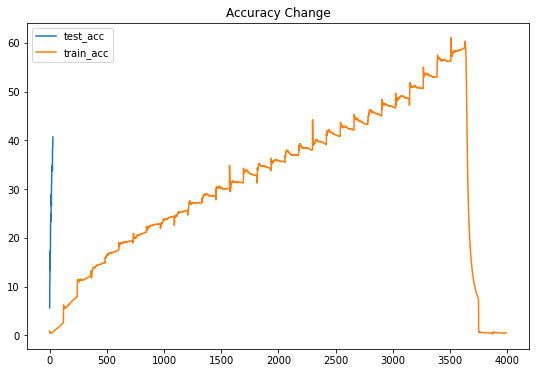

In [29]:
import matplotlib.pyplot as plt
def plot_curve(curves,title,Figsize = (7,7)):
    fig = plt.figure(figsize=Figsize)
    ax = plt.subplot()
    for curve in curves:
        ax.plot(curve[0], label=curve[1])
        plt.title(title)
    ax.legend()
    plt.show()
curves = [(train_test.test_acc,"test_acc"),(train_test.train_acc,"train_acc")]
plot_curve(curves,"Accuracy Change",Figsize = (9,6))